# 使用PyTorch来构建一个神经网络

## **Get Started：利用pandas读取csv文件中的图像**

In [ ]:
# 加载数据文件(挂载谷歌drive)

from google.colab import drive
drive.mount('/content/drive')

In [5]:
# 导入pandas库，用于读取CSV文件
import pandas
#切换文件夹
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/pytorch')

In [6]:
#查看当前目录所包含的内容
#!ls

#读取csv文件
df = pandas.read_csv('mnist_data/mnist_train.csv',header=None)
#查看DataFrame的前几行
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


MNIST的每一行数据包含785个值。第一个值是图像所表示的数字标签，其余的
784个值是图像（尺寸为28像素× 28像素）的像素值。

In [7]:
#使用info()函数查看DataFrame的概况
df.info()

print('\n该dataframe有60000行，每一行有785个值')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB

该dataframe有60000行，每一行有785个值


## **1.将一行像素值转换成实际图像**

In [8]:
# 导入pandas库用于读取csv文件
import pandas
# 导入matplotlib用于绘图
import matplotlib.pyplot as plt

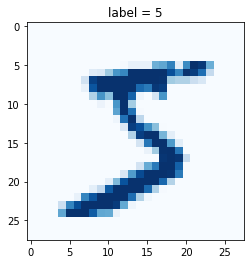

In [9]:
# 从DataFrame读取数据
row = 0
data = df.iloc[row]     #iloc索引返回一整行，这里返回第一行

# 第一个值是标签
label = data[0]

# 图像是余下的784个值
img = data[1:].values.reshape(28,28)  #图像数据转换成28x28的数组

plt.title("label = " + str(label))

# 将数组绘制为位图
# interpolation指示pyplot无须平滑像素以及cmap指定调色板的颜色为蓝色
plt.imshow(img, interpolation = 'none', cmap = 'Blues')
plt.show()


## **2.简单的神经网络**


#### **代码顺序：**
*(1)创建Mnist数据集类*

*(2)测试Mnist数据集类*

*(3)创建Classifier神经网络类*

*(4)测试Classifier神经网络类*

#### **神经网络结构:**
*输入层28x28=784个节点*

*中间层 200层（随便定）*

*输出层，由于一个数字可能为0-9，因此直接为每一种可能设一个节点，即10个节点*

*激活函数采用sigmoid函数*

#### **导包：**

In [10]:
#导包
import torch

import torch.nn as nn 
from torch.utils.data import Dataset

import pandas
import matplotlib.pyplot as plt

#### **构建并测试MNIST数据集类：**

In [11]:
# MNIST数据集类
'''
为了学习PyTorch，我们应该
尝试以PyTorch的方式加载和使用数据
'''

class MnistDataset(Dataset):
  
  def __init__(self,csv_file):
    self.data_df = pandas.read_csv(csv_file,header=None)
    pass
  

  #__len__()方法:允许PyTorch通过len(mnist_dataset)获取数据集的大小
  def __len__(self):
    return len(self.data_df) 


  #__getitem__():允许我们通过索引获取项目，例如使用mnist_dataset[3]访问第4项
  #该函数返回值作为(类的默认返回值)
  def __getitem__(self,index):
    # 目标图像（标签）
    label = self.data_df.iloc[index,0]  #label为第index行第1列
    target = torch.zeros((10))      #创建target:维度为10的张量
    target[label] = 1.0         #target只有标签项为1,其余为0(one-hot编码)

    # 图像数据，取值范围是0-255，标准化后为0-1
    image_values = torch.FloatTensor(self.data_df.iloc
                     [index,1:].values)/255.0
    
    #返回标签、图像数据张量及目标张量
    return label,image_values,target

  
  #为MnistDataset类添加一个制图方法,绘制第index+1幅图像
  def plot_image(self,index):
    #图像数据转化为28x28数组
    img = self.data_df.iloc[index,1:].values.reshape(28,28)
    #标签作为图像标题
    plt.title("label=" + str(self.data_df.iloc[index,0]))
    plt.imshow(img,interpolation='none',cmap='Blues')
    # plt.show()   #用于去除imshow结果中的格式，只显示图像

(4,
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000,

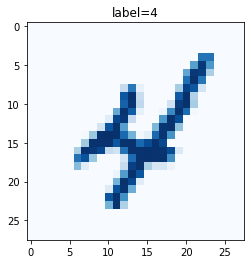

In [12]:
#切换文件夹
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/pytorch')
#测试一下数据集类
mnist_dataset = MnistDataset('mnist_data/mnist_train.csv')

#绘制图像，看是否正常显示
mnist_dataset.plot_image(9)

#检查索引是否有效,应该看到它返回标签、像素值和目标张量
mnist_dataset[9]

#### **构建并训练神经网络类：**
*当创建神经网络类时，我们需要继承PyTorch的torch.nn模块。这样一来，新的神经网络就具备了许多PyTorch的功能，如自动构建计算图、查看权重以及在训练期间更新权重等*

In [13]:
# 开始构建神经网络类
class Classifier(nn.Module):

  def __init__(self):
    # 初始化PyTorch父类
    super().__init__()  #super()._init__()语句调用了父类的初始化函数
    
    '''设计神经网络的结构'''
    # 定义神经网络层
    self.model = nn.Sequential(
        nn.Linear(784,200),   #1、2层间的权重
        nn.Sigmoid(),      #中间层激活函数
        nn.Linear(200,10),    #2、3层权重
        nn.Sigmoid()       #输出层激活函数
    )

    #创建损失函数(均方误差)
    #均方误差先计算每个输出节点的实际输出和预期输出之差的平方，再计算平均值
    self.loss_function = nn.MSELoss()

    #创建优化器(用于更新权重),采用简单的梯度下降法,学习率0.01
    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)
    '''
      在上面的代码中，我们把所有可学习参数都传递给SGD优化器。这些参数可
    以通过self.parameters()访问，这也是PyTorch提供的功能之一
    '''

    # 每完成10个训练样本之后保留一份损失副本
    # 记录训练进展的计数器和列表
    self.counter = 0
    self.progress = []

    pass


  #PyTorch假定通过一个forward()方法向网络传递信息,（提供输入，返回网络的输出）
  def forward(self,inputs):
    #直接运行模型
    return self.model(inputs)
  '''
    这里，我们只将输入传递给self.model()，它由nn.Sequential()定义。模型的输
  出直接返回给forward()的主调函数。
  '''


  #为了代码的整洁，我们选择与forward()保持一致，创建一个train()函数
  #train()既需要网络的输入值，也需要预期的目标值。这样才可以与实际输出进行比较，并计算损失值
  def train(self, inputs, targets):
    # 计算网络的输出值
    outputs = self.forward(inputs)

    # 计算损失值
    loss = self.loss_function(outputs, targets)

    # 每隔10个训练样本增加一次计数器的值，并将损失值添加进列表的末尾
    self.counter += 1
    if(self.counter % 10 == 0):
      self.progress.append(loss.item())
      #item()函数只是为了方便展开一个单值张量，获取里面的数字
      pass
    
    #每10000次训练后打印计数器的值，这样可以了解训练进展的快慢。
    if(self.counter % 10000 == 0):
      print("counter = ", self.counter)
      pass


    # 使用损失来更新网络的链接权重
    # 梯度归零，反向传播，并更新权重  (求极值？)
    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass
      
    
  #将训练时保存的的损失副本绘制成图,创建plot_progress函数
  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0,1.0), figsize=(16,8), alpha=0.1, marker='.',
        grid=True,yticks=(0,0.25,0.5))
    pass

  pass

In [14]:
%%time 
# 顶部添加%%time，用于记录一个Python笔记本单元格运行所需时间

C = Classifier()

# 使用 MNIST数据集训练网络
# 训练4个周期
epochs = 4

for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass
    pass

training epoch 1 of 4
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 4
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 4
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
training epoch 4 of 4
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
CPU times: user 4min 24s, sys: 2.8 s, total: 4min 27s
Wall time: 4min 34s


#### 测试神经网络

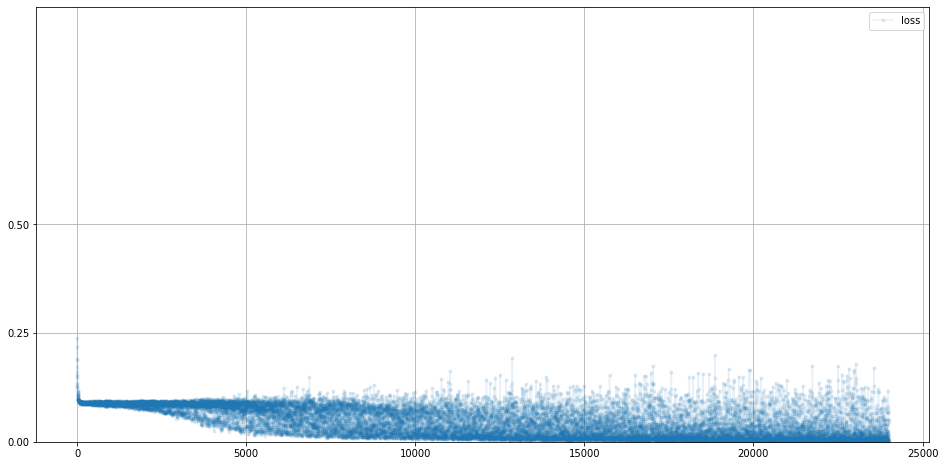

In [15]:
C.plot_progress()

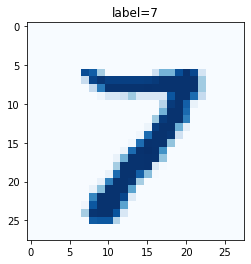

In [16]:
# 神经网络训练完成，可以进行测试了,下面直接利用测试数据来绘图

# 加载MNIST测试数据
mnist_test_dataset = MnistDataset('mnist_data/mnist_test.csv')

# 任选一幅图像，这里选择第二十幅图
record = 34

#绘制图像和标签
mnist_test_dataset.plot_image(record)

output =  tensor([5.9021e-03, 1.2156e-02, 1.2156e-01, 3.7349e-02, 1.0161e-02, 9.8959e-03,
        3.0598e-04, 8.1593e-01, 3.7881e-02, 9.9477e-02],
       grad_fn=<SigmoidBackward0>) 



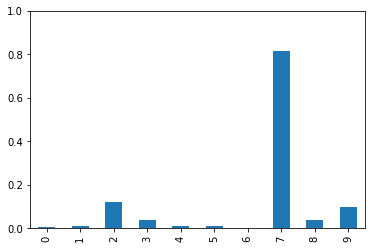

In [17]:
#验证神经网络的判别效果，提取归一化后的像素值为神经网络的输入
image_data = mnist_test_dataset[record][1]

#调用训练后的神经网络
output = C.forward(image_data)
print("output = ", output, "\n")

#绘制输出张量,这里输出被转换成一个简单的numpy数组，再被包装成一个DataFrame，以便绘制柱形图。
pandas.DataFrame(output.detach().numpy()).plot(kind='bar',legend=False,ylim=(0,1))


#10条柱形分别对应10个神经网络输出节点的值。最大值对应节点4，也就是说我们的网络认为图像是4。

#### 简易分类器的性能

In [18]:
'''
    要知道我们的神经网络对图像分类的表现如何，一种直接的方法是对MNIST
  测试数据集中所有10000幅图像进行分类，并记录正确分类的样本数。
    分类是否正确可以通过比较网络输出和图像的标签来分辨。
'''

# 测试用训练数据训练后的网络
score = 0     #分类正确有几项
items = 0     #总共有几项

# tips:对张量执行 .detach().numpy() 即可转换为一般的numpy数组
for label, image_data_tensor, target_tensor in mnist_test_dataset:
  answer = C.forward(image_data_tensor).detach().numpy()
  # argmax(a，axis)返回axis轴方向最大值的索引，a为数组'
  '比较网络输出和图像标签'
  if(answer.argmax() == label):
    score += 1
    pass
  items += 1
  pass

print(score, items, score/items)

8821 10000 0.8821
